## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-09-13 01:37:40,259: Qubit 0 adicionado à memória do Host 0.
2024-09-13 01:37:40,259: Qubit 0 criado com fidelidade inicial 0.20599032073648493 e adicionado à memória do Host 0.
2024-09-13 01:37:40,259: Qubit 1 adicionado à memória do Host 0.
2024-09-13 01:37:40,259: Qubit 1 criado com fidelidade inicial 0.23076270959287892 e adicionado à memória do Host 0.
2024-09-13 01:37:40,259: Qubit 2 adicionado à memória do Host 0.
2024-09-13 01:37:40,261: Qubit 2 criado com fidelidade inicial 0.200447077576703 e adicionado à memória do Host 0.
2024-09-13 01:37:40,261: Qubit 3 adicionado à memória do Host 0.
2024-09-13 01:37:40,262: Qubit 3 criado com fidelidade inicial 0.7761188852507603 e adicionado à memória do Host 0.
2024-09-13 01:37:40,262: Qubit 4 adicionado à memória do Host 0.
2024-09-13 01:37:40,262: Qubit 4 criado com fidelidade inicial 0.9461634897764484 e adicionado à memória do Host 0.
2024-09-13 01:37:40,263: Qubit 5 adicionado à memória do Host 0.
2024-09-13 01:37:40,263: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


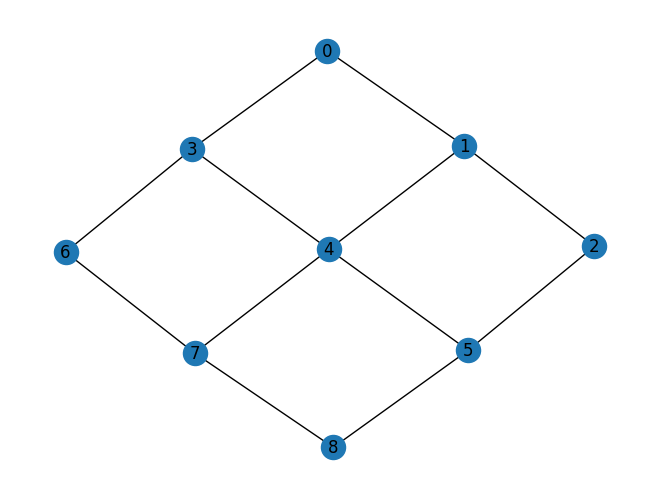

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-09-13 01:37:40,918: Qubit 1 adicionado à memória do Host 6.
2024-09-13 01:37:40,919: Qubit 2 adicionado à memória do Host 7.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000020075F7CBF0>, <quantumnet.objects.qubit.Qubit object at 0x0000020075A74F50>, <quantumnet.objects.qubit.Qubit object at 0x0000020075A55460>, <quantumnet.objects.qubit.Qubit object at 0x0000020075D7D1F0>, <quantumnet.objects.qubit.Qubit object at 0x0000020075C5C9E0>, <quantumnet.objects.qubit.Qubit object at 0x0000020075F6A720>, <quantumnet.objects.qubit.Qubit object at 0x0000020075F7CA40>, <quantumnet.objects.qubit.Qubit object at 0x0000020075F7D520>, <quantumnet.objects.qubit.Qubit object at 0x0000020075CA5580>, <quantumnet.objects.qubit.Qubit object at 0x0000020075E1D8E0>, <quantumnet.objects.qubit.Qubit object at 0x0000020075DAD400>]
[<quantumnet.objects.qubit.Qubit object at 0x0000020075F69CA0>, <quantumnet.objects.qubit.Qubit object at 0x0000020075D7DA60>, <quantumnet.objects.qubit.Qubit object at 0x0000020075D58920>, <quantumnet.objects.qubit.Qubit object at 0x0000020075F7D880>, <quantumnet.objects.qubit.Qubit object at 0x000002007

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()

##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-09-13 01:37:40,939: A fidelidade do qubit Qubit 1 with state 0 é 0.027007853070640575
2024-09-13 01:37:40,940: A fidelidade do qubit Qubit 2 with state 0 é 0.9115033864376985
2024-09-13 01:37:40,940: A fidelidade entre o qubit 0.027007853070640575 e o qubit 0.9115033864376985 é 0.024617749534300678


0.024617749534300678

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-09-13 01:37:40,949: A fidelidade do qubit Qubit 1 with state 0 é 0.027007853070640575


0.027007853070640575

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-13 01:37:40,956: Timeslot 1: Par epr criado com fidelidade 0.5948730631097553
2024-09-13 01:37:40,956: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-09-13 01:37:40,964: A fidelidade do qubit Qubit 1 with state 0 é 0.02673777453993417


0.02673777453993417

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_demand(2,5)

2024-09-13 01:37:40,973: A fidelidade do qubit Qubit 29 with state 0 é 0.210781454031257
2024-09-13 01:37:40,973: A fidelidade do qubit Qubit 59 with state 0 é 0.46659949954239494
2024-09-13 01:37:40,973: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [12]:
rede.physical.echp_on_replay(2,5)

2024-09-13 01:37:40,982: A fidelidade do qubit Qubit 28 with state 0 é 0.14395365798220192
2024-09-13 01:37:40,983: A fidelidade do qubit Qubit 58 with state 0 é 0.06805394453485841
2024-09-13 01:37:40,984: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


False

In [13]:
rede.get_total_useds_eprs()

2024-09-13 01:37:40,992: Eprs usados na camada PhysicalLayer: 1
2024-09-13 01:37:40,992: Eprs usados na camada LinkLayer: 0
2024-09-13 01:37:40,993: Eprs usados na camada NetworkLayer: 0


1

In [14]:
rede.get_total_useds_qubits()

2024-09-13 01:37:41,002: Qubits usados na camada PhysicalLayer: 6
2024-09-13 01:37:41,002: Qubits usados na camada LinkLayer: 0
2024-09-13 01:37:41,003: Qubits usados na camada TransportLayer: 0
2024-09-13 01:37:41,003: Qubits usados na camada ApplicationLayer: 0


6

##### Acessando o canal que mostra as probablidades e os pares eprs


In [15]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.8085820103566412,
 'prob_replay_epr_create': 0.9396966915574376,
 'eprs': [<quantumnet.objects.epr.Epr at 0x20075facf80>,
  <quantumnet.objects.epr.Epr at 0x20075f7d8e0>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [16]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x20075f6a210>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x20075f69fa0>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x20075f7fd70>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x20075f7c890>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x20075facf80>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x20075f7d7f0>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x20075f7df40>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x20075f7e120>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x20075fae870>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x20075f7ebd0>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x20075ddf410>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x20075fafe60>,
  <quantumnet.objects.epr.Epr at 0x20075fc0140>]}

In [17]:
rede.get_timeslot()

4